# Time Series Window Splits

In [ ]:
!apt-get install texlive-latex-extra
!apt-get install texlive-fonts-recommended texlive-fonts-extra cm-super
!apt-get install dvipng

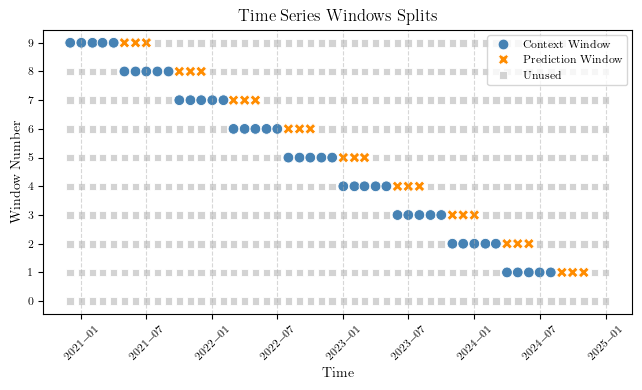

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Parameters
context_length = 5  # Length of the context window
prediction_length = 3  # Length of the prediction window
time_series_length = 50  # Total length of the time series

# Generate time series data
time_series = pd.date_range(start="2020-12", periods=time_series_length, freq="MS")  # Monthly start

# Calculate context and prediction windows
context_windows = []
prediction_windows = []
for start in range(0, time_series_length - context_length - prediction_length + 1, context_length):
    context_windows.append(range(start, start + context_length))
    prediction_windows.append(range(start + context_length, start + context_length + prediction_length))

# Prepare data for seaborn
data = []
unused_ignore = set()

for i, window in enumerate(context_windows): 
    for t_idx in window:
        unused_ignore.add(( time_series[t_idx], len(prediction_windows) - i))
        data.append({"Time": time_series[t_idx], "Window": len(context_windows) - i, "Type": "Context Window"})

for i, window in enumerate(prediction_windows): 
    for t_idx in window:
        unused_ignore.add(( time_series[t_idx], len(prediction_windows) - i))
        data.append({"Time": time_series[t_idx], "Window": len(prediction_windows) - i, "Type": "Prediction Window"})

for t_idx, t in enumerate(time_series):
    for window_num in range(len(context_windows) + 1):  # Add unused points for all windows
        if (t, window_num) not in unused_ignore:
          data.append({"Time": t, "Window": window_num, "Type": "Unused"})

df = pd.DataFrame(data)

# Plot using seaborn
plt.figure(figsize=(469.75499 / 72 , 4))  # Compact size for two-column paper
sns.scatterplot(
    data=df,
    x="Time",
    y="Window",
    hue="Type",
    style="Type",
    palette={"Unused": "lightgray", "Context Window": "steelblue", "Prediction Window": "darkorange"},
    s=60,  # Adjusted marker size for better visibility
    legend="brief"  # Minimized legend for compactness
)

# Customize plot
plt.title("Time Series Windows Splits")
plt.xlabel("Time")
plt.ylabel("Window Number")
plt.xticks(rotation=45, fontsize=8)  # Rotate and format date labels
plt.yticks(df["Window"].unique(), sorted(df["Window"].unique(), reverse=True), fontsize=8)  # Ensure rows are ascending
plt.legend(loc="upper right", fontsize=8, title_fontsize=9)  # Smaller legend for compactness
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

# Display plot
# plt.show()
plt.rcParams.update({
    "font.family": "serif",          # Use a serif font like Times New Roman
    "font.serif": ["Computer Modern Typewriter"],  # Specifically Times New Roman
    "text.usetex": True,             # Use LaTeX for text rendering
    "pgf.texsystem": "pdflatex",     # Ensure we use pdflatex for generating the plot
    "pgf.rcfonts": False,             # Disable the use of rcParams fonts (use LaTeX's fonts)
    "pgf.texsystem": "pdflatex"

})
plt.savefig('outputs/windows_split.pdf', backend='pgf')
